# Mission to Mars

![mission_to_mars](Images/mission_to_mars.jpg)


In this assignment, you will build a web application that scrapes various websites for data related to the Mission to Mars and displays the information in a single HTML page. The following outlines what you need to do.

## Step 1 - Scraping

Complete your initial scraping using Jupyter Notebook, BeautifulSoup, Pandas, and Requests/Splinter.

* Create a Jupyter Notebook file called `mission_to_mars.ipynb` and use this to complete all of your scraping and analysis tasks. The following outlines what you need to scrape.

### NASA Mars News

* Scrape the [NASA Mars News Site](https://mars.nasa.gov/news/) and collect the latest News Title and Paragragh Text. Assign the text to variables that you can reference later.

```python
# Example:
news_title = "NASA's Next Mars Mission to Investigate Interior of Red Planet"

news_p = "Preparation of NASA's next spacecraft to Mars, InSight, has ramped up this summer, on course for launch next May from Vandenberg Air Force Base in central California -- the first interplanetary launch in history from America's West Coast."
```


In [1]:
# Dependencies
import pandas as pd
import re
import requests
import pymongo
from splinter import Browser
from bs4 import BeautifulSoup

In [2]:
# Scraping NASA Mars News
news_url = 'https://mars.nasa.gov/news/'
news_html = requests.get(news_url)

In [3]:
# Parsing w/ BS4
news_soup = BeautifulSoup(news_html.text, 'html.parser')

In [4]:
# Print body
print(news_soup.body.prettify())

<body id="news">
 <div id="main_container">
  <div id="site_body">
   <div class="site_header_area">
    <header class="site_header">
     <div class="brand_area">
      <div class="brand1">
       <a class="nasa_logo" href="http://www.nasa.gov" target="_blank" title="visit nasa.gov">
        NASA
       </a>
      </div>
      <div class="brand2">
       <a class="top_logo" href="https://science.nasa.gov/" target="_blank" title="Explore NASA Science">
        NASA Science
       </a>
       <a class="sub_logo" href="/mars-exploration/#" title="Mars">
        Mars Exploration Program
       </a>
      </div>
      <img alt="" class="print_only print_logo" src="/assets/logo_nasa_trio_black@2x.png"/>
     </div>
     <a class="visuallyhidden focusable" href="#page">
      Skip Navigation
     </a>
     <div class="right_header_container">
      <a class="menu_button" href="javascript:void(0);" id="menu_button">
       <span class="menu_icon">
        menu
       </span>
      </a>
      

In [5]:
# Print news article titles
news_titles = news_soup.find_all('div', class_='content_title')
news_titles

[<div class="content_title">
 <a href="/news/8326/nasa-invests-in-visionary-technology/">
 NASA Invests in Visionary Technology 
 </a>
 </div>, <div class="content_title">
 <a href="/news/8325/nasa-is-ready-to-study-the-heart-of-mars/">
 NASA is Ready to Study the Heart of Mars
 </a>
 </div>, <div class="content_title">
 <a href="/news/8322/nasa-briefing-on-first-mission-to-study-mars-interior/">
 NASA Briefing on First Mission to Study Mars Interior
 </a>
 </div>, <div class="content_title">
 <a href="/news/8321/new-ar-mobile-app-features-3-d-nasa-spacecraft/">
 New 'AR' Mobile App Features 3-D NASA Spacecraft
 </a>
 </div>, <div class="content_title">
 <a href="/news/8317/witness-first-mars-launch-from-west-coast/">
 Witness First Mars Launch from West Coast
 </a>
 </div>, <div class="content_title">
 <a href="/news/8315/nasa-insight-mission-to-mars-arrives-at-launch-site/">
 NASA InSight Mission to Mars Arrives at Launch Site
 </a>
 </div>]

In [6]:
# Print title text only
for news in news_titles:
    title = news.find('a')
    news_title = title.text
    print(news_title)


NASA Invests in Visionary Technology 


NASA is Ready to Study the Heart of Mars


NASA Briefing on First Mission to Study Mars Interior


New 'AR' Mobile App Features 3-D NASA Spacecraft


Witness First Mars Launch from West Coast


NASA InSight Mission to Mars Arrives at Launch Site



In [7]:
# Print News Paragraphs
mars_parag = news_soup.find_all('div', class_='rollover_description')
mars_parag

[<div class="rollover_description">
 <div class="rollover_description_inner">
 NASA is investing in technology concepts, including several from JPL, that may one day be used for future space exploration missions.
 </div>
 <div class="overlay_arrow">
 <img alt="More" src="/assets/overlay-arrow.png"/>
 </div>
 </div>, <div class="rollover_description">
 <div class="rollover_description_inner">
 NASA is about to go on a journey to study the center of Mars.
 </div>
 <div class="overlay_arrow">
 <img alt="More" src="/assets/overlay-arrow.png"/>
 </div>
 </div>, <div class="rollover_description">
 <div class="rollover_description_inner">
 NASA’s next mission to Mars will be the topic of a media briefing Thursday, March 29, at JPL. The briefing will air live on NASA Television and the agency’s website.
 </div>
 <div class="overlay_arrow">
 <img alt="More" src="/assets/overlay-arrow.png"/>
 </div>
 </div>, <div class="rollover_description">
 <div class="rollover_description_inner">
 NASA space

In [8]:
# Print paragraph text only
for paragraph in mars_parag:
    p_text = paragraph.find('div', class_='rollover_description_inner')
    mars_p = p_text.text
    print(mars_p)


NASA is investing in technology concepts, including several from JPL, that may one day be used for future space exploration missions.


NASA is about to go on a journey to study the center of Mars.


NASA’s next mission to Mars will be the topic of a media briefing Thursday, March 29, at JPL. The briefing will air live on NASA Television and the agency’s website.


NASA spacecraft travel to far-off destinations in space, but a new mobile app produced by NASA's Jet Propulsion Laboratory, Pasadena, California, brings spacecraft to users.


NASA invites digital creators to apply for social media credentials to cover the launch of the InSight mission to Mars, May 3-5, at California's Vandenberg Air Force Base.


NASA's InSight spacecraft has arrived at Vandenberg Air Force Base in central California to begin final preparations for a launch this May.



### JPL Mars Space Images - Featured Image

* Visit the url for JPL's Featured Space Image [here](https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars).

* Use splinter to navigate the site and find the image url for the current Featured Mars Image and assign the url string to a variable called `featured_image_url`.

* Make sure to find the image url to the full size `.jpg` image.

* Make sure to save a complete url string for this image.

```python
# Example:
featured_image_url = 'https://www.jpl.nasa.gov/spaceimages/images/largesize/PIA16225_hires.jpg'
```

In [9]:
# Open browser of Mars space images# Open b 
mars_img_browser = Browser('chrome', headless=False)
jpl_url = 'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars'
mars_img_browser.visit(jpl_url)

In [10]:
# Parse html file with BeautifulSoup
mars_img_html = mars_img_browser.html
jpl_soup = BeautifulSoup(mars_img_html, 'html.parser')

In [11]:
# Print body of html# Print  
print(jpl_soup.body.prettify())

<body class="dark_background logged_out mobile_menu" id="images" style="">
 <!--[if lt IE 9]>
      <div class='browsehappy' style='font-size: 30px; color: white; position:absolute; top: 0; margin: 0; height: 3000px; width: 100%; background: #000; z-index: 10000; padding: 5%;'>
        You are using an
        <strong>outdated</strong>
        browser. Please
        <a href='http://browsehappy.com/'>click here</a>
        to upgrade or change your browser.
      </div>
    <![endif]-->
 <div id="main_container">
  <div id="site_body">
   <div class="site_header_area">
    <header class="site_header">
     <div class="brand_area">
      <div class="brand1">
       <a class="nasa_logo" href="http://www.nasa.gov" title="NASA">
        NASA
       </a>
      </div>
      <div class="brand2">
       <div class="jpl_logo">
        <a href="//www.jpl.nasa.gov/" id="jpl_logo" title="Jet Propulsion Laboratory">
         Jet Propulsion Laboratory
        </a>
       </div>
       <div class="ca

In [12]:
# Find all images on page
mars_imgs = jpl_soup.find_all('div', class_='carousel_items')
mars_imgs

[<div class="carousel_items">
 <article alt="Dione Divided" class="carousel_item" style="background-image: url('/spaceimages/images/wallpaper/PIA18358-1920x1200.jpg');">
 <div class="default floating_text_area ms-layer">
 <h2 class="category_title">
 </h2>
 <h2 class="brand_title">
 				  FEATURED IMAGE
 				</h2>
 <h1 class="media_feature_title">
 				  Dione Divided				</h1>
 <div class="description">
 </div>
 <footer>
 <a class="button fancybox" data-description="Dione appears cut in two by Saturn's razor-thin rings, seen nearly edge-on in a view from NASA's Cassini spacecraft." data-fancybox-group="images" data-fancybox-href="/spaceimages/images/mediumsize/PIA18358_ip.jpg" data-link="/spaceimages/details.php?id=PIA18358" data-title="Dione Divided" id="full_image">
 					FULL IMAGE
 				  </a>
 </footer>
 </div>
 <div class="gradient_container_top"></div>
 <div class="gradient_container_bottom"></div>
 </article>
 </div>]

In [13]:
# Retrieve our featured image url
for img in mars_imgs:
    large_pic = img.find(class_='button fancybox').get('data-fancybox-href')
    
    featured_image_url = f'https://www.jpl.nasa.gov{large_pic}'
    print(featured_image_url)

https://www.jpl.nasa.gov/spaceimages/images/mediumsize/PIA18358_ip.jpg



### Mars Weather

* Visit the Mars Weather twitter account [here](https://twitter.com/marswxreport?lang=en) and scrape the latest Mars weather tweet from the page. Save the tweet text for the weather report as a variable called `mars_weather`.

```python
# Example:
mars_weather = 'Sol 1801 (Aug 30, 2017), Sunny, high -21C/-5F, low -80C/-112F, pressure at 8.82 hPa, daylight 06:09-17:55'
```

In [14]:
# Retrieve tweets using Splinter
twitter_browser = Browser('chrome', headless=False)
twitter_url = 'https://twitter.com/marswxreport?lang=en'
twitter_browser.visit(twitter_url)

In [15]:
# Parse with BeautifulSoup
twitter_html = twitter_browser.html
twitter_soup = BeautifulSoup(twitter_html, 'html.parser')

<body class="three-col logged-out user-style-MarsWxReport ms-windows enhanced-mini-profile ProfilePage ProfilePage--withWarning supports-drag-and-drop dropdown-enabled" data-fouc-class-names="swift-loading" dir="ltr">
 <div class="visuallyhidden" id="kb-shortcuts-msg">
  <h2>
   Keyboard Shortcuts
  </h2>
  <p>
   Keyboard shortcuts are available for common actions and site navigation.
   <button id="show-shortcuts-btn" tabindex="-1" type="button">
    View Keyboard Shortcuts
   </button>
   <button id="dismiss-shortcuts-btn" tabindex="-1" type="button">
    Dismiss this message
   </button>
  </p>
 </div>
 <script language="javascript" src="/F9CD80F3-B79B-49AB-AD16-6F61BFFFC81B/netdefender/ls/ls.js" type="text/javascript">
 </script>
 <script language="javascript" src="/F9CD80F3-B79B-49AB-AD16-6F61BFFFC81B/netdefender/ls/twitter.js" type="text/javascript">
 </script>
 <script id="swift_loading_indicator" nonce="">
  document.body.className=document.body.className+" "+document.body.get
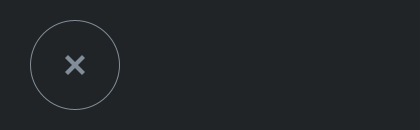

In [17]:
# Print body of twitter html
print(twitter_soup.body.prettify())

In [18]:
# Find all mars weather tweets with BeautifulSoup
weather_tweets = twitter_soup.find_all('p', class_='TweetTextSize')
weather_tweets

[<p class="TweetTextSize TweetTextSize--normal js-tweet-text tweet-text" data-aria-label-part="0" lang="en">Sol 2030 (April 22, 2018), Sunny, high -4C/24F, low -73C/-99F, pressure at 7.21 hPa, daylight 05:25-17:21</p>,
 <p class="TweetTextSize TweetTextSize--normal js-tweet-text tweet-text" data-aria-label-part="0" lang="en">Sol 2029 (April 21, 2018), Sunny, high -11C/12F, low -72C/-97F, pressure at 7.22 hPa, daylight 05:25-17:21</p>,
 <p class="TweetTextSize TweetTextSize--normal js-tweet-text tweet-text" data-aria-label-part="0" lang="en">Sol 2026 (April 18, 2018), Sunny, high -6C/21F, low -73C/-99F, pressure at 7.19 hPa, daylight 05:26-17:21</p>,
 <p class="TweetTextSize TweetTextSize--normal js-tweet-text tweet-text" data-aria-label-part="0" lang="en">Sol 2024 (April 16, 2018), Sunny, high -7C/19F, low -76C/-104F, pressure at 7.20 hPa, daylight 05:26-17:21</p>,
 <p class="TweetTextSize TweetTextSize--normal js-tweet-text tweet-text" data-aria-label-part="0" lang="en">Sol 2022 (Apri

In [21]:
# Filter tweets beginning with 'sol' to retrieve weather text
weather_filter = 'Sol'
for tweet in weather_tweets:
    if weather_filter in tweet.text and 'Happy' not in tweet.text:
        mars_weather = tweet.text
        print(mars_weather)

Sol 2030 (April 22, 2018), Sunny, high -4C/24F, low -73C/-99F, pressure at 7.21 hPa, daylight 05:25-17:21
Sol 2029 (April 21, 2018), Sunny, high -11C/12F, low -72C/-97F, pressure at 7.22 hPa, daylight 05:25-17:21
Sol 2026 (April 18, 2018), Sunny, high -6C/21F, low -73C/-99F, pressure at 7.19 hPa, daylight 05:26-17:21
Sol 2024 (April 16, 2018), Sunny, high -7C/19F, low -76C/-104F, pressure at 7.20 hPa, daylight 05:26-17:21
Sol 2022 (April 14, 2018), Sunny, high -4C/24F, low -73C/-99F, pressure at 7.19 hPa, daylight 05:27-17:21
Sol 2019 (April 11, 2018), Sunny, high -6C/21F, low -75C/-103F, pressure at 7.18 hPa, daylight 05:27-17:21
Sol 2017 (April 09, 2018), Sunny, high -6C/21F, low -75C/-103F, pressure at 7.17 hPa, daylight 05:28-17:21
Sol 2016 (April 08, 2018), Sunny, high -9C/15F, low -73C/-99F, pressure at 7.18 hPa, daylight 05:28-17:21
Sol 2012 (April 04, 2018), Sunny, high -7C/19F, low -74C/-101F, pressure at 7.15 hPa, daylight 05:29-17:22
Sol 2011 (April 03, 2018), Sunny, high -1

### Mars Facts

* Visit the Mars Facts webpage [here](http://space-facts.com/mars/) and use Pandas to scrape the table containing facts about the planet including Diameter, Mass, etc.

* Use Pandas to convert the data to a HTML table string.


In [23]:
# Store mars facts URL
facts_url = 'http://space-facts.com/mars/'

In [24]:
# Read table from URL
facts_table = pd.read_html(facts_url)
facts_table

[                      0                              1
 0  Equatorial Diameter:                       6,792 km
 1       Polar Diameter:                       6,752 km
 2                 Mass:  6.42 x 10^23 kg (10.7% Earth)
 3                Moons:            2 (Phobos & Deimos)
 4       Orbit Distance:       227,943,824 km (1.52 AU)
 5         Orbit Period:           687 days (1.9 years)
 6  Surface Temperature:                  -153 to 20 °C
 7         First Record:              2nd millennium BC
 8          Recorded By:           Egyptian astronomers]

In [25]:
# Use pandas for table format
mars_facts = facts_table[0]

# Transpose table to make header
mars_df = mars_facts.transpose()

# Re-name all headers
mars_df.columns = [
    'Equatorial Diameter',
    'Polar Diameter',
    'Mass',
    'Moons',
    'Orbit Distance',
    'Orbit Period',
    'Surface Temperature',
    'First Record',
    'Recorded By'
]

# Drop sub-header
mars_facts_df = mars_df.iloc[1:]

mars_facts_df

,Equatorial Diameter,Polar Diameter,Mass,Moons,Orbit Distance,Orbit Period,Surface Temperature,First Record,Recorded By
1,"6,792 km","6,752 km",6.42 x 10^23 kg (10.7% Earth),2 (Phobos & Deimos),"227,943,824 km (1.52 AU)",687 days (1.9 years),-153 to 20 °C,2nd millennium BC,Egyptian astronomers


In [29]:
# Convert the table to HTML data string
mars_facts_html = mars_facts_df.to_html()
print(mars_facts_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Equatorial Diameter</th>
      <th>Polar Diameter</th>
      <th>Mass</th>
      <th>Moons</th>
      <th>Orbit Distance</th>
      <th>Orbit Period</th>
      <th>Surface Temperature</th>
      <th>First Record</th>
      <th>Recorded By</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>6,792 km</td>
      <td>6,752 km</td>
      <td>6.42 x 10^23 kg (10.7% Earth)</td>
      <td>2 (Phobos &amp; Deimos)</td>
      <td>227,943,824 km (1.52 AU)</td>
      <td>687 days (1.9 years)</td>
      <td>-153 to 20 °C</td>
      <td>2nd millennium BC</td>
      <td>Egyptian astronomers</td>
    </tr>
  </tbody>
</table>


### Mars Hemispheres

* Visit the USGS Astrogeology site [here](https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars) to obtain high resolution images for each of Mar's hemispheres.

* You will need to click each of the links to the hemispheres in order to find the image url to the full resolution image.

* Save both the image url string for the full resolution hemipshere image, and the Hemisphere title containing the hemisphere name. Use a Python dictionary to store the data using the keys `img_url` and `title`.

* Append the dictionary with the image url string and the hemisphere title to a list. This list will contain one dictionary for each hemisphere.

```python
# Example:
hemisphere_image_urls = [
    {"title": "Valles Marineris Hemisphere", "img_url": "..."},
    {"title": "Cerberus Hemisphere", "img_url": "..."},
    {"title": "Schiaparelli Hemisphere", "img_url": "..."},
    {"title": "Syrtis Major Hemisphere", "img_url": "..."},
]
```

In [30]:
# Retrieve hemisphere images and links using Splinter
usgs_browser = Browser('chrome', headless=False)
usgs_url = 'https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars'
usgs_browser.visit(usgs_url)

In [31]:
# Parse hemisphere html using BS
hemi_html = usgs_browser.html
hemi_soup = BeautifulSoup(hemi_html, "html.parser")

In [32]:
# Print body
print(hemi_soup.body.prettify())

<body id="results">
 <header>
  <h1>
   Astrogeology Science Center
  </h1>
  <a href="http://www.usgs.gov">
   <img alt="USGS: Science for a Changing World" class="logo" height="70" src="/images/usgs_logo_main_2x.png" width="180"/>
  </a>
 </header>
 <div class="wrapper">
  <nav>
   <a href="#" id="nav-toggle" title="Navigation Menu">
    Menu
   </a>
   <ul class="dropdown dropdown-horizontal" id="yw0">
    <li>
     <a href="/">
      Home
     </a>
    </li>
    <li>
     <a href="/about">
      About
     </a>
     <ul>
      <li>
       <a href="/about/careers">
        Careers
       </a>
      </li>
      <li>
       <a href="/contact">
        Contact
       </a>
      </li>
      <li>
       <a href="/about/events">
        Events
       </a>
      </li>
      <li>
       <a href="/site/glossary">
        Glossary
       </a>
      </li>
      <li>
       <a href="/about/mission">
        Mission
       </a>
      </li>
      <li>
       <a href="/news">
        News
       <

In [35]:
# Find image link and title
hemi_description = hemi_soup.find_all('div', class_='description')
print(hemi_description)

[<div class="description"><a class="itemLink product-item" href="/search/map/Mars/Viking/cerberus_enhanced"><h3>Cerberus Hemisphere Enhanced</h3></a><span class="subtitle" style="float:left">image/tiff 21 MB</span><span class="pubDate" style="float:right"></span><br/><p>Mosaic of the Cerberus hemisphere of Mars projected into point perspective, a view similar to that which one would see from a spacecraft. This mosaic is composed of 104 Viking Orbiter images acquired…</p></div>, <div class="description"><a class="itemLink product-item" href="/search/map/Mars/Viking/schiaparelli_enhanced"><h3>Schiaparelli Hemisphere Enhanced</h3></a><span class="subtitle" style="float:left">image/tiff 35 MB</span><span class="pubDate" style="float:right"></span><br/><p>Mosaic of the Schiaparelli hemisphere of Mars projected into point perspective, a view similar to that which one would see from a spacecraft. The images were acquired in 1980 during early northern…</p></div>, <div class="description"><a cl

In [37]:
# Create list of dictionaries containing img title and link
hemi_img_urls = []

for image in hemi_description:
    found_hemi_url = image.find('a', class_='itemLink')
    partial_hemi_url = found_hemi_url.get('href')
    complete_hemi_url = 'https://astrogeology.usgs.gov' + partial_hemi_url
    print(complete_hemi_url)
    
    # Visit each link
    usgs_browser.visit(complete_hemi_url)
    
    # Create dictionary containing title and image url
    hemi_img_dict = {}
    
    # Parse html again
    mars_hemi_html = usgs_browser.html
    mars_hemi_soup = BeautifulSoup(mars_hemi_html, 'html.parser')
    
    # Get image link
    hemi_link = mars_hemi_soup.find('a', text='Original').get('href')
    
    # Get title text
    hemi_title = mars_hemi_soup.find('h2', class_='title').text.replace(' Enhanced', '')
    
    # Append title and image urls of hemisphere to dictionary
    hemi_img_dict['title'] = hemi_title
    hemi_img_dict['img_url'] = hemi_link
    
    # Append dictionaries to list
    hemi_img_urls.append(hemi_img_dict)

print(hemi_img_urls)

https://astrogeology.usgs.gov/search/map/Mars/Viking/cerberus_enhanced
https://astrogeology.usgs.gov/search/map/Mars/Viking/schiaparelli_enhanced
https://astrogeology.usgs.gov/search/map/Mars/Viking/syrtis_major_enhanced
https://astrogeology.usgs.gov/search/map/Mars/Viking/valles_marineris_enhanced
[{'title': 'Cerberus Hemisphere', 'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif'}, {'title': 'Schiaparelli Hemisphere', 'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif'}, {'title': 'Syrtis Major Hemisphere', 'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif'}, {'title': 'Valles Marineris Hemisphere', 'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif'}]


In [39]:
# Convert jupyter notebook file into python script 'scrape_mars.py'
! jupyter nbconvert --to script --template basic Mission_to_Mars.ipynb --output scrape_mars

[NbConvertApp] Converting notebook Mission_to_Mars.ipynb to script
[NbConvertApp] Writing 8636 bytes to scrape_mars.py
